## Background on San Ildefonso Pueblo
Located just about 10 miles from Los Alamos, NM, San Ildefonso is one of the closet situated Indigenous settlements to the nation’s leading nuclear defense lab, Los Alamos National Laboratory (LANL). Though many residents of San Ildefonso have historically been employed by the lab, the two communities comprise a remarkable wealth disparity - in 2023, the median household income for the City of Los Alamos was about $63,000 higher than that for San Ildefonso Pueblo (Los Alamos, NM, 2023; San Ildefonso Pueblo, NM, 2023). LANL has a long history of unethical and often publicly concealed waste discharging, having on many occasions dumped untreated radioactive and other waste into adjacent canyons. This began in the 1940s when LANL was established and occupied as the principal site for development of the atomic bomb. Through a more recent shift in environmental health perception, activism, and policymaking, LANL waste procedures have generally become less problematic. However, such history of unrestricted dumping has permanently contaminated surface water, soils and sediment, and groundwater throughout the nearby canyons flowing to the Rio Grande (Amigos Bravos & Concerned Citizens for Nuclear Safety, 2006). Researchers generally agree that radiation spreading through air or water can severely impact vegetation health extending to the scale of entire ecosystems, causing cascading negative effects even when released in small quantities (DeLoss, 2023; Bonacic et al., 2023; Petit-Berghem & Lemperiere, 2012). As long ago as 2005, LANL acknowledged that radioactive contamination linked to cancer and other health detriments has moved from LANL property onto Pueblo of San Ildefonso lands (LANL, 2005). The following analysis of San Ildefonso Pueblo using a normalized difference vegetation index (NDVI) intends to discover any significant changes in the area’s vegetation health between 2017 and 2023, as well as whether any presence of recent change can be linked to the spread of radioactive contamination. It includes python code used to generate the analysis. MODIS vegetation index data for the analysis was downloaded from NASA Earthdata, using AppEEARS to request extraction. 

## Methods and Results

In [ ]:
# Load libraries
### vector data
import geopandas as gpd
import pandas as pd

### raster data
import rioxarray as rxr
import xarray as xr

### maps and plots
import holoviews as hv
import hvplot.pandas
import hvplot.xarray

### open street map
from osmnx import features as osm
import osmnx as ox

### file structure
import os
import pathlib

### earthpy
import earthpy
import earthpy.api.appeears as eaapp

In [2]:
### set up project and folder for data
project = earthpy.Project("Gila River Vegetation", dirname = 'san_ildefonso_ndvi')


In [ ]:
# get polygon for area of interest
### search for PRNS
sip_gdf = ox.geocode_to_gdf(
    'San Ildefonso Pueblo')

### check it out
sip_gdf

,geometry,bbox_west,bbox_south,bbox_east,bbox_north,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((-106.27703 35.85521, -106.27559 35.8...",-106.277028,35.826332,-106.062454,35.930908,305673388,relation,9436262,35.880326,-106.14354,boundary,aboriginal_lands,25,0.418305,aboriginal_lands,San Ildefonso Pueblo,"San Ildefonso Pueblo, Santa Fe County, New Mex..."


<Axes: >

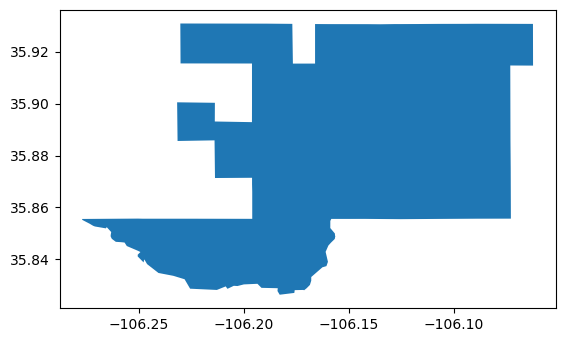

In [4]:
### make a quick plot
sip_gdf.plot()

Above is the study site of San Ildefonso Pueblo, visualized in blue. Los Alamos county and lab is situated just west of the pueblo’s boundary. Historic waste paths entering San Ildefonso have therefore moved primarily through the canyon flowing into the southwest corner of the pueblo.

In [ ]:
# Get NDVI for area of interest
### initialize AppeearsDownloader for MODIS NDVI data
### set parameters
ndvi_downloader = eaapp.AppeearsDownloader(

    ### give your download a name
    download_key = "san_ildefonso_ndvi",

    ### tell it to put the data in your project that you already defined
    project = project,

    ### specify the MODIS product you want
    product = 'MOD13Q1.061',
    layer = '_250m_16_days_NDVI',

    ### choose a start date and end data
    start_date = "06-01",
    end_date = "07-30",

    ### recurring means you want those dates over multiple years
    recurring = True,

    ### specify the range of years you want
    year_range = [2017, 2023],

    ### specify the polygon you want to get NDVI data for
    polygon = sip_gdf
)

In [6]:
ndvi_downloader

In [7]:
### download the prepared download -- this can take a while!
ndvi_downloader.download_files(cache=True)

No stored credentials found for urs.earthdata.nasa.gov. Please log in.


/opt/conda/lib/python3.11/site-packages/earthpy/api/auth.py:192: UserWarning: Setting credentials not supported for 'netrc' backend.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/earthpy/api/auth.py:196: UserWarning: Failed to store credentials with 'keyring': No recommended backend was available. Install a recommended 3rd party backend package; or, install the keyrings.alt package if you want to use the non-recommended backends. See https://pypi.org/project/keyring for details.
  warnings.warn(


Credentials stored using 'env' backend.


In [8]:
### get a sorted list of NDVI file paths
ndvi_paths = sorted(list(project.project_dir.rglob('*NDVI*.tif')))

ndvi_paths

[PosixPath('/workspaces/data/san_ildefonso_ndvi/san_ildefonso_ndvi/MOD13Q1.061_2017137_to_2023211/MOD13Q1.061__250m_16_days_NDVI_doy2017145000000_aid0001.tif'),
 PosixPath('/workspaces/data/san_ildefonso_ndvi/san_ildefonso_ndvi/MOD13Q1.061_2017137_to_2023211/MOD13Q1.061__250m_16_days_NDVI_doy2017161000000_aid0001.tif'),
 PosixPath('/workspaces/data/san_ildefonso_ndvi/san_ildefonso_ndvi/MOD13Q1.061_2017137_to_2023211/MOD13Q1.061__250m_16_days_NDVI_doy2017177000000_aid0001.tif'),
 PosixPath('/workspaces/data/san_ildefonso_ndvi/san_ildefonso_ndvi/MOD13Q1.061_2017137_to_2023211/MOD13Q1.061__250m_16_days_NDVI_doy2017193000000_aid0001.tif'),
 PosixPath('/workspaces/data/san_ildefonso_ndvi/san_ildefonso_ndvi/MOD13Q1.061_2017137_to_2023211/MOD13Q1.061__250m_16_days_NDVI_doy2017209000000_aid0001.tif'),
 PosixPath('/workspaces/data/san_ildefonso_ndvi/san_ildefonso_ndvi/MOD13Q1.061_2017137_to_2023211/MOD13Q1.061__250m_16_days_NDVI_doy2018145000000_aid0001.tif'),
 PosixPath('/workspaces/data/san_i

In [9]:
len(ndvi_paths)

35

In [ ]:
doy_start = -25
doy_end = -19

# Loop through each NDVI image
ndvi_das = []
for ndvi_path in ndvi_paths:
    # Get date from file name
    doy = ndvi_path.name[doy_start:doy_end]
    date = pd.to_datetime(doy, format='%Y%j')

    # Open dataset
    da = rxr.open_rasterio(ndvi_path, mask_and_scale=True).squeeze()

    # Add date dimension and clean up metadata
    da = da.assign_coords({'date': date})
    da = da.expand_dims({'date': 1})
    da.name = 'NDVI'

    # Prepare for concatenation
    ndvi_das.append(da)

#len(ndvi_das)
ndvi_das

[<xarray.DataArray 'NDVI' (date: 1, y: 51, x: 104)> Size: 21kB
 array([[[0.3287    , 0.30429998, 0.2853    , ..., 0.1494    ,
          0.15699999, 0.15699999],
         [0.35099998, 0.345     , 0.427     , ..., 0.1287    ,
          0.14289999, 0.14289999],
         [0.4818    , 0.5046    , 0.5046    , ..., 0.1287    ,
          0.1287    , 0.1303    ],
         ...,
         [0.3353    , 0.3238    , 0.3238    , ..., 0.2332    ,
          0.2332    , 0.2332    ],
         [0.3256    , 0.39069998, 0.39069998, ..., 0.2311    ,
          0.2311    , 0.2311    ],
         [0.3217    , 0.3217    , 0.37469998, ..., 0.2285    ,
          0.2285    , 0.22819999]]], shape=(1, 51, 104), dtype=float32)
 Coordinates:
     band         int64 8B 1
   * x            (x) float64 832B -106.3 -106.3 -106.3 ... -106.1 -106.1 -106.1
   * y            (y) float64 408B 35.93 35.93 35.93 35.92 ... 35.83 35.83 35.83
     spatial_ref  int64 8B 0
   * date         (date) datetime64[ns] 8B 2017-01-14
 Attribute

In [12]:
# Combine NDVI images from all dates
da = xr.combine_by_coords(ndvi_das, coords=['date'])
da

/tmp/ipykernel_2946/3619952311.py:2: FutureWarning: In a future version of xarray the default value for compat will change from compat='no_conflicts' to compat='override'. This is likely to lead to different results when combining overlapping variables with the same name. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set compat explicitly.
  da = xr.combine_by_coords(ndvi_das, coords=['date'])
/tmp/ipykernel_2946/3619952311.py:2: FutureWarning: In a future version of xarray the default value for compat will change from compat='no_conflicts' to compat='override'. This is likely to lead to different results when combining overlapping variables with the same name. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set compat explicitly.
  da = xr.combine_by_coords(ndvi_das, coords=['date'])


<xarray.Dataset> Size: 744kB
Dimensions:      (date: 35, y: 51, x: 104)
Coordinates:
    band         int64 8B 1
  * x            (x) float64 832B -106.3 -106.3 -106.3 ... -106.1 -106.1 -106.1
  * y            (y) float64 408B 35.93 35.93 35.93 35.92 ... 35.83 35.83 35.83
    spatial_ref  int64 8B 0
  * date         (date) datetime64[ns] 280B 2017-01-14 2017-01-16 ... 2023-01-20
Data variables:
    NDVI         (date, y, x) float32 743kB 0.3287 0.3043 ... 0.2176 0.2149

In [14]:
# Calculate the difference in NDVI
ndvi_diff = (
    da.sel(date=slice('2020', '2023'))
    .mean('date')
    .NDVI 
    
    - da.sel(date=slice('2017', '2020'))
    .mean('date')
    .NDVI
)

ndvi_diff

<xarray.DataArray 'NDVI' (y: 51, x: 104)> Size: 21kB
array([[-0.00269008, -0.00636998, -0.009065  , ...,  0.00321999,
         0.00398   ,  0.00398   ],
       [ 0.00454   ,  0.00909999, -0.00651503, ...,  0.00087999,
         0.00395499,  0.00395499],
       [-0.02029991, -0.01746508, -0.01746508, ...,  0.00212002,
         0.00212002,  0.00091501],
       ...,
       [-0.00325501,  0.00284001,  0.00284001, ...,  0.00590499,
         0.00698502,  0.00698502],
       [-0.01119497, -0.00371999, -0.00371999, ...,  0.00658503,
         0.00658503,  0.00518   ],
       [-0.00259   , -0.00259   , -0.00264001, ...,  0.00678501,
         0.00678501,  0.00619997]], shape=(51, 104), dtype=float32)
Coordinates:
    band         int64 8B 1
  * x            (x) float64 832B -106.3 -106.3 -106.3 ... -106.1 -106.1 -106.1
  * y            (y) float64 408B 35.93 35.93 35.93 35.92 ... 35.83 35.83 35.83
    spatial_ref  int64 8B 0

In [15]:
# Plot the NDVI difference

(ndvi_diff.hvplot(x='x', y='y', cmap='PiYG', 
                 geo=True, title='Change in NDVI @ San Ildefonso Pueblo\n2020-2023 vs. 2017-2020')
*

sip_gdf.hvplot(geo=True, fill_color=None, line_color='grey'))

:Overlay
   .Image.I    :Image   [x,y]   (NDVI)
   .Polygons.I :Polygons   [Longitude,Latitude]

The above map visualizes the difference in NDVI between a 2017-2020 date range and a 2020-2023 date range. In this map, negative or pink pixels indicate locations that have worsened in vegetation health over time, while positive or green pixels indicate locations that have improved in vegetation health over time. The map shows that many areas around the southwest corner of the pueblo and into Los Alamos county have worsened slightly over this timeframe. Some areas further east within the pueblo have greatly worsened over time, likely a product of development within the main town center of San Ildefonso itself. 

<Axes: >

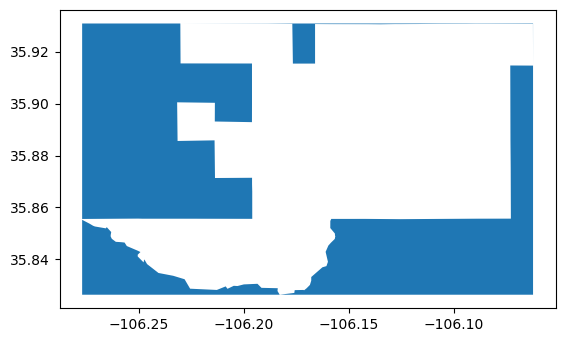

In [16]:
# Compute the area outside the San Ildefonso Pueblo boundary

outside_sip_gdf = (
    gpd.GeoDataFrame(geometry=sip_gdf.envelope)
    .overlay(sip_gdf, how='difference'))

outside_sip_gdf.plot()

Above is a visualization of the area outside of the San Ildefonso Pueblo boundary, used for the following analyses.

In [18]:
# Clip NDVI data to both inside and outside the boundary
ndvi_inside = da.rio.clip(sip_gdf.geometry, from_disk=True)
print(ndvi_inside)

ndvi_outside = da.rio.clip(outside_sip_gdf.geometry, from_disk=True)
print(ndvi_outside)

<xarray.Dataset> Size: 723kB
Dimensions:      (x: 103, y: 50, date: 35)
Coordinates:
    band         int64 8B 1
  * x            (x) float64 824B -106.3 -106.3 -106.3 ... -106.1 -106.1 -106.1
  * y            (y) float64 400B 35.93 35.93 35.93 35.92 ... 35.83 35.83 35.83
  * date         (date) datetime64[ns] 280B 2017-01-14 2017-01-16 ... 2023-01-20
    spatial_ref  int64 8B 0
Data variables:
    NDVI         (date, y, x) float32 721kB nan nan nan nan ... nan nan nan nan
<xarray.Dataset> Size: 723kB
Dimensions:      (x: 103, y: 50, date: 35)
Coordinates:
    band         int64 8B 1
  * x            (x) float64 824B -106.3 -106.3 -106.3 ... -106.1 -106.1 -106.1
  * y            (y) float64 400B 35.93 35.93 35.93 35.92 ... 35.83 35.83 35.83
  * date         (date) datetime64[ns] 280B 2017-01-14 2017-01-16 ... 2023-01-20
    spatial_ref  int64 8B 0
Data variables:
    NDVI         (date, y, x) float32 721kB 0.3287 0.3043 ... 0.2175 0.2175


In [19]:
# Compute mean annual July NDVI
july_ndvi_inside_df = (ndvi_inside
                       .groupby(ndvi_inside.date.dt.year)
                       .mean(...)
                       .NDVI.to_dataframe())
print('Mean NDVI inside SIP\n', july_ndvi_inside_df.head())

july_ndvi_outside_df = (ndvi_outside
                       .groupby(ndvi_outside.date.dt.year)
                       .mean(...)
                       .NDVI.to_dataframe())
print('Mean NDVI outside SIP\n', july_ndvi_outside_df.head())

Mean NDVI inside SIP
       band  spatial_ref      NDVI
year                             
2017     1            0  0.230232
2018     1            0  0.207764
2019     1            0  0.234397
2020     1            0  0.214432
2021     1            0  0.222136
Mean NDVI outside SIP
       band  spatial_ref      NDVI
year                             
2017     1            0  0.271296
2018     1            0  0.241111
2019     1            0  0.283219
2020     1            0  0.257061
2021     1            0  0.262820


In [20]:
# Join inside and outside SIP df and rename columns
july_ndvi_df = (july_ndvi_inside_df[['NDVI']]
                .join(july_ndvi_outside_df[['NDVI']], 
                      lsuffix=' Inside SIP', 
                      rsuffix=' Outside SIP'))
july_ndvi_df

,NDVI Inside SIP,NDVI Outside SIP
year,,
2017,0.230232,0.271296
2018,0.207764,0.241111
2019,0.234397,0.283219
2020,0.214432,0.257061
2021,0.222136,0.262820
2022,0.230156,0.270170
2023,0.217379,0.260225


In [21]:
# Plot mean NDVI inside and outside SIP boundary
july_ndvi_df.hvplot(title='Mean July NDVI Inside and Outside SIP')

:NdOverlay   [Variable]
   :Curve   [year]   (value)

The above plot compares vegetation health change from 2017 - 2023 for the outside and inside of San Ildefonso Pueblo, for the month of July in particular. The plot shows that NDVI values outside the pueblo are generally higher than within the pueblo boundary, but that they remain on relatively similar tracks, especially since 2020. 

In [22]:
# Plot difference inside and outside the boundary
july_ndvi_df['Difference'] = (july_ndvi_df['NDVI Outside SIP'] 
                              - july_ndvi_df['NDVI Inside SIP'])
july_ndvi_df

,NDVI Inside SIP,NDVI Outside SIP,Difference
year,,,
2017,0.230232,0.271296,0.041064
2018,0.207764,0.241111,0.033348
2019,0.234397,0.283219,0.048822
2020,0.214432,0.257061,0.042630
2021,0.222136,0.262820,0.040684
2022,0.230156,0.270170,0.040014
2023,0.217379,0.260225,0.042846


In [23]:
# Plot difference inside and outside the boundary
july_ndvi_df.Difference.hvplot(title='Difference in NDVI within and outside SIP')

:Curve   [year]   (Difference)

This last plot visualizes the difference in vegetation health change between the outside and inside of the pueblo, again for the month of July. While the plot is somewhat exaggerated due to a small range of difference values (y axis), it does demonstrate a similarity in NDVI values in 2018 that becomes more disparate again in following years. Referring back to the previous comparison plot, this change in NDVI difference seems to result from outside NDVI values becoming even greater post-2018 than inside NDVI values, especially in 2019 where a particularly healthy July was much more effective outside of the pueblo than inside. 

## Discussion
While there is some evidence that areas closer to Los Alamos have worsened more than other areas in San Ildefonso over time, this analysis cannot make a firm conclusion as to whether this may result from radioactive contamination, other lab practices, or unrelated change. It does find vegetation health to be generally higher outside of San Ildefonso Pueblo than inside, despite a large riparian area of the Rio Grande situated within the pueblo boundary. Considerations relating to pueblo water infrastructure and environmental monitoring might therefore be helpful to lessen this disparity. Further research will be required to investigate vegetation health differences and potential traces to waste from Los Alamos.

## References:
Amigos Bravos & Concerned Citizens for Nuclear Safety. (2006). HISTORIC AND CURRENT DISCHARGES FROM LOS ALAMOS  NATIONAL LABORATORY: ANALYSIS AND RECOMMENDATIONS [Review of HISTORIC AND CURRENT DISCHARGES FROM LOS ALAMOS NATIONAL LABORATORY: ANALYSIS AND RECOMMENDATIONS]. https://nukewatch.org/wp-content/uploads/2019/08/amigos_bravos.pdf

Bonacic, C., Medellin, R. A., Ripple, W., Sukumar, R., Ganswindt, A., Padua, S. M., Padua, C., Pearl, M. C., Aguirre, L. F., Valdés, L. M., Buchori, D., Innes, J. L., Ibarra, J. T., Rozzi, R., & Aguirre, A. A. (2023). Scientists warning on the ecological effects of radioactive leaks on ecosystems. Frontiers in Ecology and Evolution, 10. https://doi.org/10.3389/fevo.2022.1099162

DeLoss, J. (2023, February 3). International group of scientists warns nuclear radiation has devastating impacts on ecosystems. Warner College of Natural Resources. https://warnercnr.source.colostate.edu/international-group-of-scientists-warns-nuclear-radiation-has-devastating-impacts-on-ecosystems/
‌
Didan, K. (2021). MODIS/Terra Vegetation Indices 16-Day L3 Global 250m SIN Grid V061 [Data set]. NASA Land Processes Distributed Active Archive Center. https://doi.org/10.5067/MODIS/MOD13Q1.061 Date Accessed: 2025-11-26

LANL, 2005. Environmental Surveillance at Los Alamos during 2004, LA-14239-ENV. September 2005.

Los Alamos, NM | Data USA. (2023). Datausa.io. https://datausa.io/profile/geo/los-alamos-nm

Petit-Berghem, Y., Lemperiere, G. Vegetation Cover and Long-Term Conservation of Radioactive Waste Packages: The Case Study of the CSM Waste Disposal Facility (Manche District, France). Environmental Management 49, 605–622 (2012). https://doi.org/10.1007/s00267-011-9805-2
‌
San Ildefonso Pueblo, NM | Data USA. (2023). Datausa.io. https://datausa.io/profile/geo/san-ildefonso-pueblo-nm/